The first step is to import the packages that will be needed for my analysis of population data

In [8]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [9]:
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp


In this code I will import data and view the first five rows of the data

In [10]:
new_pop_data = pd.read_csv(r"NST-EST2024-ALLDATA.csv")
new_pop_data.head()

,c,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2023,...,RINTERNATIONALMIG2023,RINTERNATIONALMIG2024,RDOMESTICMIG2021,RDOMESTICMIG2022,RDOMESTICMIG2023,RDOMESTICMIG2024,RNETMIG2021,RNETMIG2022,RNETMIG2023,RNETMIG2024
0,10,0,0,0,United States,331515736,331577720,332099760,334017321,336806231,...,6.840246,8.231786,0.000000,0.000000,0.000000,0.000000,1.133093,5.084797,6.840246,8.231786
1,20,1,0,0,Northeast Region,57617706,57431458,57252533,57159597,57398303,...,8.175150,9.848371,-4.674375,-7.824957,-4.857718,-3.334322,-3.271477,-2.006798,3.317432,6.514050
2,30,1,1,0,New England,15122011,15057350,15118145,15175633,15263573,...,8.005202,9.622685,2.416795,-2.957175,-2.067991,-1.575091,4.188365,4.325839,5.937211,8.047594
3,30,1,2,0,Middle Atlantic,42495695,42374108,42134388,41983964,42134730,...,8.236647,9.930153,-7.206423,-9.578005,-5.867209,-3.971810,-5.935167,-4.287388,2.369438,5.958342
4,20,2,0,0,Midwest Region,68998970,68984258,68872831,68903297,69186401,...,4.859117,5.861482,-2.502867,-2.649762,-1.300416,-0.709222,-1.700819,0.891824,3.558701,5.152260


This code shows the final five rows of the data set

In [11]:
new_pop_data.tail()

,c,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2023,...,RINTERNATIONALMIG2023,RINTERNATIONALMIG2024,RDOMESTICMIG2021,RDOMESTICMIG2022,RDOMESTICMIG2023,RDOMESTICMIG2024,RNETMIG2021,RNETMIG2022,RNETMIG2023,RNETMIG2024
61,40,4,9,53,Washington,7707586,7727209,7743760,7794123,7857320,...,8.570200,10.316588,-2.028057,-0.444333,-2.209764,0.337770,-0.219379,5.160549,6.360436,10.654358
62,40,3,5,54,West Virginia,1793736,1791646,1785618,1774122,1770495,...,1.309027,1.604870,1.668314,0.162371,1.859721,2.553330,2.074770,1.102328,3.168749,4.158200
63,40,2,3,55,Wisconsin,5894170,5897375,5881608,5903975,5930405,...,3.083727,3.724715,-3.158677,1.273081,1.298758,1.064973,-2.617204,4.614960,4.382486,4.789688
64,40,4,8,56,Wyoming,576844,577681,579636,581978,585067,...,1.777138,2.191552,3.126196,4.216547,2.983604,1.468425,3.362951,5.165227,4.760742,3.659977
65,40,X,X,72,Puerto Rico,3285874,3281590,3262711,3220137,3203792,...,-0.016812,4.745995,0.000000,0.000000,0.000000,0.000000,-1.319316,-8.681678,-0.016812,4.745995


In [12]:
pop_sub = new_pop_data[["NAME", "POPESTIMATE2023", "RINTERNATIONALMIG2023","RDOMESTICMIG2023","RNETMIG2023", "RINTERNATIONALMIG2024", "RDOMESTICMIG2024", "RNETMIG2024",  ]]

In [13]:
pop_sub.head()

,NAME,POPESTIMATE2023,RINTERNATIONALMIG2023,RDOMESTICMIG2023,RNETMIG2023,RINTERNATIONALMIG2024,RDOMESTICMIG2024,RNETMIG2024
0,United States,336806231,6.840246,0.000000,6.840246,8.231786,0.000000,8.231786
1,Northeast Region,57398303,8.175150,-4.857718,3.317432,9.848371,-3.334322,6.514050
2,New England,15263573,8.005202,-2.067991,5.937211,9.622685,-1.575091,8.047594
3,Middle Atlantic,42134730,8.236647,-5.867209,2.369438,9.930153,-3.971810,5.958342
4,Midwest Region,69186401,4.859117,-1.300416,3.558701,5.861482,-0.709222,5.152260


In [14]:
pop_sub.rename(columns={'POPESTIMATE2023':'popestimate2023', 'RINTERNATIONALMIG2023':'internationalmig2023', 'RDOMESTICMIG2023':'domesticmig2023', 'RNETMIG2023':'netmig2023','RINTERNATIONALMIG2024':'internationalmig2024', 'RDOMESTICMIG2024':'domesticmig2024', 'RNETMIG2024':'netmig2024'}, inplace=True)
pop_sub.head()

C:\Users\mchlp\AppData\Local\Temp\ipykernel_24276\2076279280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_sub.rename(columns={'POPESTIMATE2023':'popestimate2023', 'RINTERNATIONALMIG2023':'internationalmig2023', 'RDOMESTICMIG2023':'domesticmig2023', 'RNETMIG2023':'netmig2023','RINTERNATIONALMIG2024':'internationalmig2024', 'RDOMESTICMIG2024':'domesticmig2024', 'RNETMIG2024':'netmig2024'}, inplace=True)


,NAME,popestimate2023,internationalmig2023,domesticmig2023,netmig2023,internationalmig2024,domesticmig2024,netmig2024
0,United States,336806231,6.840246,0.000000,6.840246,8.231786,0.000000,8.231786
1,Northeast Region,57398303,8.175150,-4.857718,3.317432,9.848371,-3.334322,6.514050
2,New England,15263573,8.005202,-2.067991,5.937211,9.622685,-1.575091,8.047594
3,Middle Atlantic,42134730,8.236647,-5.867209,2.369438,9.930153,-3.971810,5.958342
4,Midwest Region,69186401,4.859117,-1.300416,3.558701,5.861482,-0.709222,5.152260


Text(0, 0.5, 'Totals')

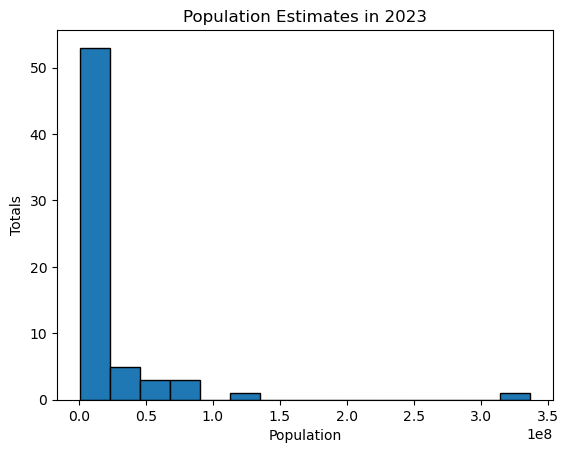

In [15]:
pop_sub.hist("popestimate2023", bins =15, edgecolor = "black", grid=False)
plt.title("Population Estimates in 2023")
plt.xlabel("Population")
plt.ylabel("Totals")



Text(0, 0.5, 'Totals')

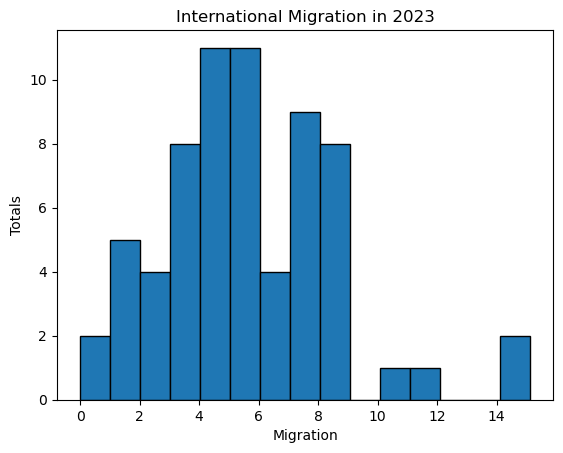

In [16]:
pop_sub.hist("internationalmig2023", bins=15, edgecolor = "black", grid=False)
plt.title("International Migration in 2023")
plt.xlabel("Migration")
plt.ylabel("Totals")

Text(0, 0.5, 'Totals')

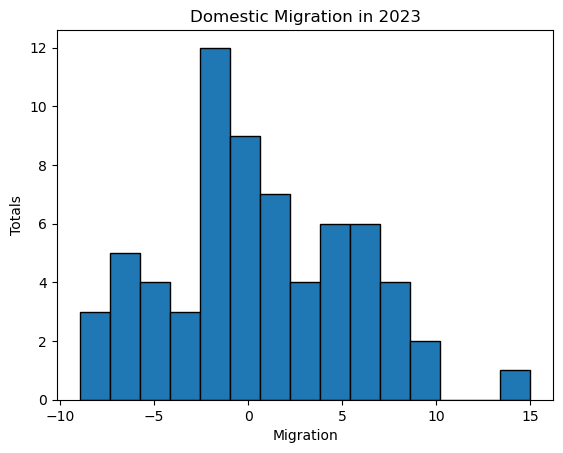

In [17]:
pop_sub.hist("domesticmig2023", bins=15, edgecolor = "black", grid=False)
plt.title("Domestic Migration in 2023")
plt.xlabel("Migration")
plt.ylabel("Totals")

Text(0, 0.5, 'Totals')

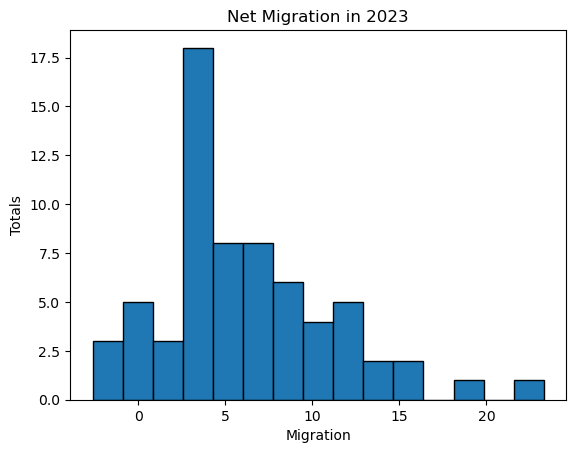

In [18]:
pop_sub.hist("netmig2023", bins=15, edgecolor = "black", grid=False)
plt.title("Net Migration in 2023")
plt.xlabel("Migration")
plt.ylabel("Totals")


Text(0, 0.5, 'Totals')

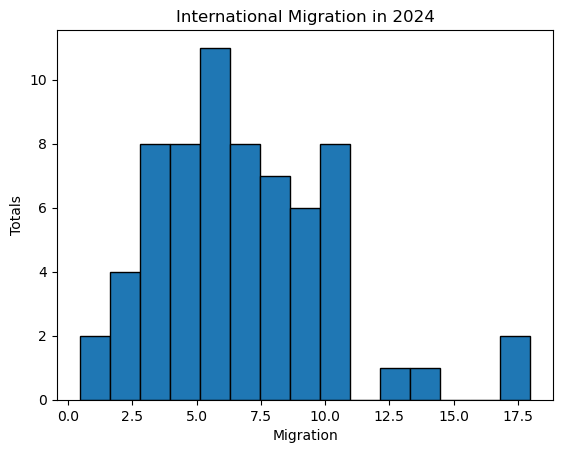

In [19]:
pop_sub.hist("internationalmig2024", bins=15, edgecolor = "black", grid=False)
plt.title("International Migration in 2024")
plt.xlabel("Migration")
plt.ylabel("Totals")

Text(0, 0.5, 'Totals')

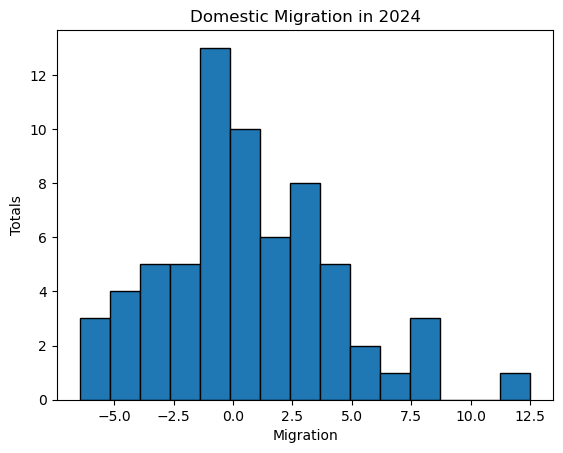

In [20]:
pop_sub.hist("domesticmig2024", bins=15, edgecolor = "black", grid=False)
plt.title("Domestic Migration in 2024")
plt.xlabel("Migration")
plt.ylabel("Totals")

Text(0, 0.5, 'Totals')

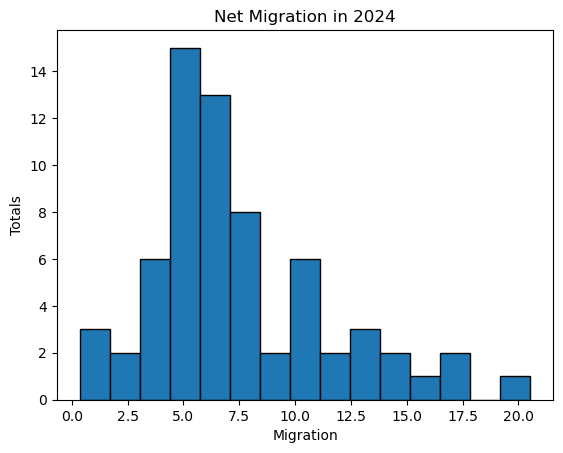

In [21]:
pop_sub.hist("netmig2024", bins=15, edgecolor = "black", grid=False)
plt.title("Net Migration in 2024")
plt.xlabel("Migration")
plt.ylabel("Totals")


For the following summary statistics I removed the state name column with the drop command. The name column cannot be used for summary statistics.

In [22]:
pop_sub.describe()

,popestimate2023,internationalmig2023,domesticmig2023,netmig2023,internationalmig2024,domesticmig2024,netmig2024
count,6.600000e+01,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,2.046104e+07,5.604665,0.632548,6.237214,6.811009,0.681475,7.492484
std,4.600011e+07,2.973309,5.054493,4.957009,3.445100,3.702904,4.112687
min,5.850670e+05,-0.016812,-8.969980,-2.610829,0.446103,-6.456030,0.345378
25%,2.945254e+06,3.472095,-2.023871,3.335611,4.324618,-1.474819,4.979594
50%,6.069222e+06,5.281272,0.000000,5.140924,6.328952,0.149280,6.311731
75%,1.861892e+07,7.327038,4.754527,8.501991,8.853701,3.030828,9.767059
max,3.368062e+08,15.131421,15.004452,23.287515,17.994004,12.523258,20.543170


In [23]:
pop_sub.drop([ "NAME", "domesticmig2024", "domesticmig2023"], axis= 1).mode(axis="index")

,popestimate2023,internationalmig2023,netmig2023,internationalmig2024,netmig2024
0,585067,-0.016812,-2.610829,0.446103,0.345378
1,648708,0.329281,-2.032697,1.604870,0.628587
2,687324,1.309027,-1.309862,1.753687,1.249100
3,736510,1.437615,-0.825888,1.998111,1.781452
4,789047,1.623627,-0.326715,2.191552,2.332715
...,...,...,...,...,...
61,68684308,8.643265,14.525762,10.461458,14.784949
62,69186401,10.591214,14.911299,12.704169,15.383927
63,79328169,11.560242,15.474602,13.844130,16.799457
64,130893358,15.113932,18.606067,17.776488,17.508963


In [33]:
from scipy.stats import binom, poisson,geom,randint

The following code creates my CDF for domestic migration. First I created a new variable for domestic migration. Next I created the code to calculate the values and appended them to the cdf values list.

In [24]:
data = pop_sub["domesticmig2023"]

data_len= len(data)
cdf_values=[]
for i in range(data_len):
    cdf_value = np.sum(data <= data[i])/data_len
    cdf_values.append(cdf_value)


print(cdf_values)


[np.float64(0.5151515151515151), np.float64(0.18181818181818182), np.float64(0.25757575757575757), np.float64(0.12121212121212122), np.float64(0.36363636363636365), np.float64(0.2727272727272727), np.float64(0.48484848484848486), np.float64(0.803030303030303), np.float64(0.8333333333333334), np.float64(0.7727272727272727), np.float64(0.7575757575757576), np.float64(0.19696969696969696), np.float64(0.6818181818181818), np.float64(0.06060606060606061), np.float64(0.8636363636363636), np.float64(0.09090909090909091), np.float64(0.7272727272727273), np.float64(0.8484848484848485), np.float64(0.030303030303030304), np.float64(0.5606060606060606), np.float64(0.3181818181818182), np.float64(0.9848484848484849), np.float64(0.21212121212121213), np.float64(0.9393939393939394), np.float64(0.7424242424242424), np.float64(0.045454545454545456), np.float64(0.9090909090909091), np.float64(0.10606060606060606), np.float64(0.5454545454545454), np.float64(0.3939393939393939), np.float64(0.3030303030303

This code creates the graph showing the cdf

c:\Users\mchlp\anaconda3\envs\pop2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


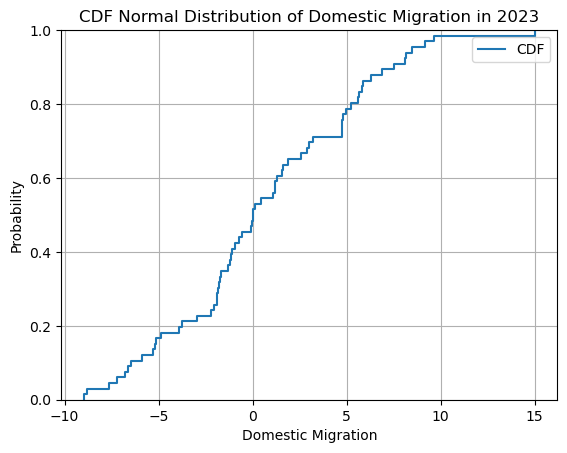

In [25]:
sns.ecdfplot(data, label="CDF")
plt.title("CDF Normal Distribution of Domestic Migration in 2023")
plt.xlabel("Domestic Migration")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()

In [26]:
data_1 = pop_sub["netmig2023"]

data_1_len= len(data_1)
cdf_values=[]
for i in range(data_1_len):
    cdf_value = np.sum(data_1 <= data_1[i])/data_1_len
    cdf_values.append(cdf_value)


print(cdf_values)

[np.float64(0.6515151515151515), np.float64(0.25757575757575757), np.float64(0.5606060606060606), np.float64(0.16666666666666666), np.float64(0.2878787878787879), np.float64(0.22727272727272727), np.float64(0.4090909090909091), np.float64(0.9090909090909091), np.float64(0.9242424242424242), np.float64(0.7121212121212122), np.float64(0.8787878787878788), np.float64(0.19696969696969696), np.float64(0.7727272727272727), np.float64(0.10606060606060606), np.float64(0.7424242424242424), np.float64(0.030303030303030304), np.float64(0.8939393939393939), np.float64(0.6818181818181818), np.float64(0.045454545454545456), np.float64(0.5454545454545454), np.float64(0.6212121212121212), np.float64(0.9696969696969697), np.float64(0.8484848484848485), np.float64(1.0), np.float64(0.7878787878787878), np.float64(0.06060606060606061), np.float64(0.8181818181818182), np.float64(0.13636363636363635), np.float64(0.3939393939393939), np.float64(0.3484848484848485), np.float64(0.2727272727272727), np.float64(

c:\Users\mchlp\anaconda3\envs\pop2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


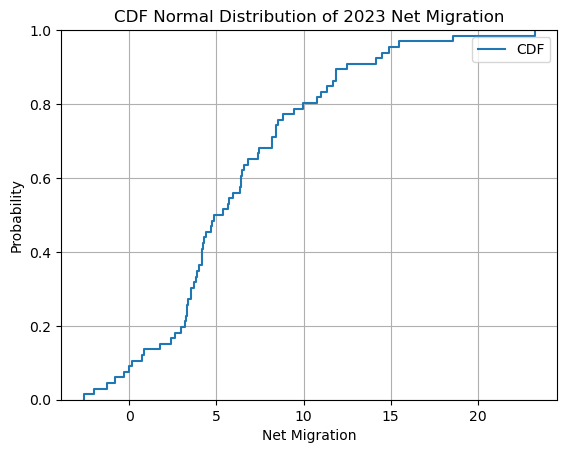

In [27]:
sns.ecdfplot(data_1, label="CDF")
plt.title("CDF Normal Distribution of 2023 Net Migration")
plt.xlabel("Net Migration")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()

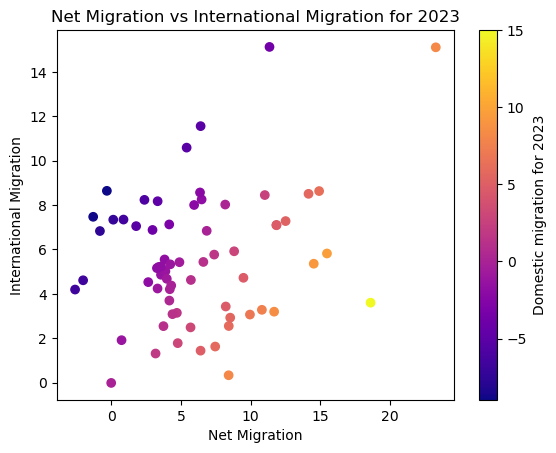

In [28]:


plt.scatter(x = "netmig2023", y = "internationalmig2023", data = pop_sub, c="domesticmig2023", cmap="plasma")
plt.rcParams["figure.figsize"] = (10,8)
plt.title("Net Migration vs International Migration for 2023")
plt.xlabel("Net Migration")
plt.ylabel("International Migration")
plt.colorbar(label = "Domestic migration for 2023")
plt.show()

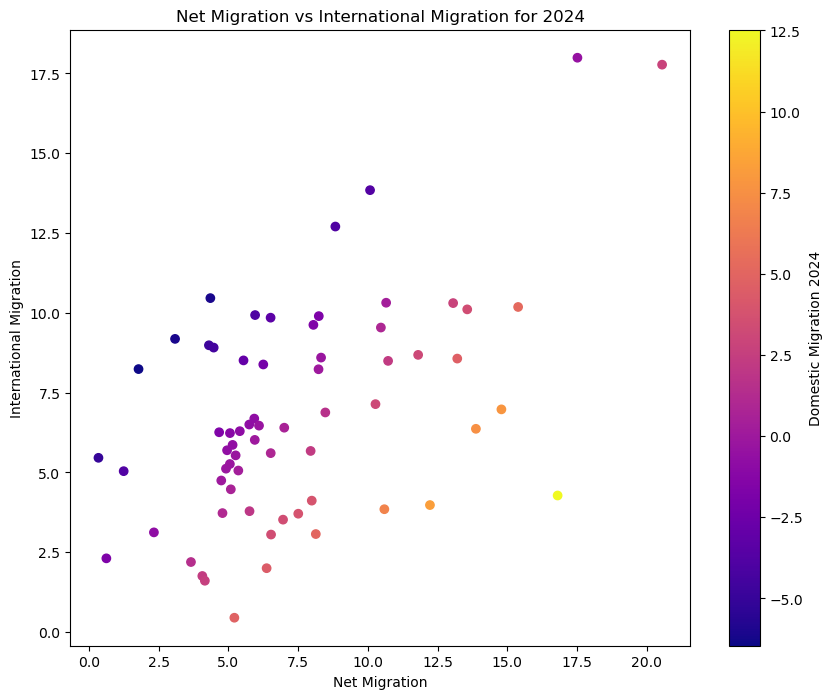

In [29]:
plt.scatter(x = "netmig2024", y = "internationalmig2024", data = pop_sub, c="domesticmig2024", cmap="plasma")
plt.rcParams["figure.figsize"] = (8,8)
plt.title("Net Migration vs International Migration for 2024")
plt.xlabel("Net Migration")
plt.ylabel("International Migration")
plt.colorbar(label= "Domestic Migration 2024")
plt.show()

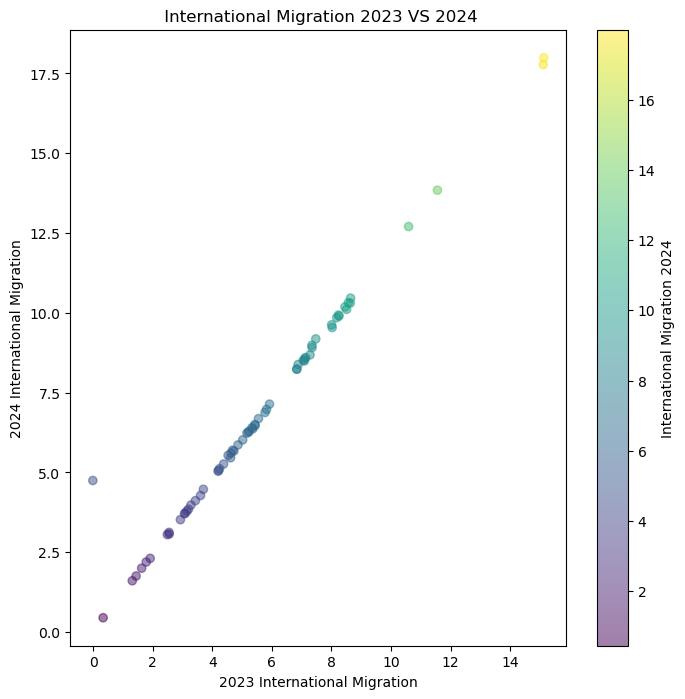

In [30]:
plt.scatter(x = "internationalmig2023", y = "internationalmig2024", data = pop_sub, c="internationalmig2024",
            alpha=0.5)
plt.rcParams["figure.figsize"] = (8,8)
plt.title(" International Migration 2023 VS 2024")
plt.xlabel("2023 International Migration")
plt.ylabel("2024 International Migration")
plt.colorbar(label="International Migration 2024")
plt.show()

In [31]:
ttest, pvalue =ttest_ind(pop_sub["internationalmig2023"], pop_sub["domesticmig2023"])
pvalue

np.float64(2.1813859463207808e-10)

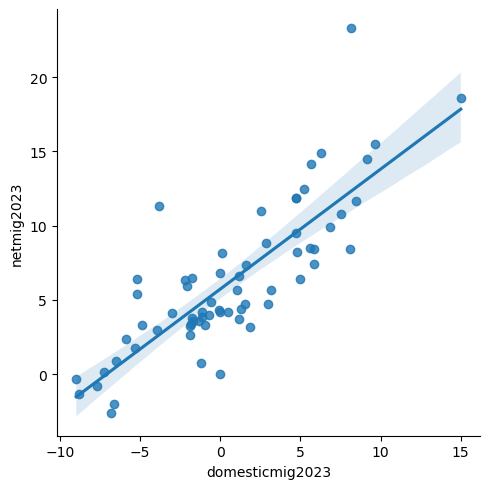

In [32]:
sns.lmplot(x = "domesticmig2023", y ="netmig2023" , data = pop_sub)
plt.show()

In [33]:
pop_sub_1= pop_sub.drop("NAME", axis = 1)

pop_sub_1.head()

,popestimate2023,internationalmig2023,domesticmig2023,netmig2023,internationalmig2024,domesticmig2024,netmig2024
0,336806231,6.840246,0.000000,6.840246,8.231786,0.000000,8.231786
1,57398303,8.175150,-4.857718,3.317432,9.848371,-3.334322,6.514050
2,15263573,8.005202,-2.067991,5.937211,9.622685,-1.575091,8.047594
3,42134730,8.236647,-5.867209,2.369438,9.930153,-3.971810,5.958342
4,69186401,4.859117,-1.300416,3.558701,5.861482,-0.709222,5.152260


In [34]:
pop_sub_1.columns

Index(['popestimate2023', 'internationalmig2023', 'domesticmig2023',
       'netmig2023', 'internationalmig2024', 'domesticmig2024', 'netmig2024'],
      dtype='object')

In [35]:
X = pop_sub_1[['popestimate2023', 'internationalmig2023', 'domesticmig2023']]


In [36]:
y = pop_sub_1['netmig2023']

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [40]:
model = LinearRegression()


In [42]:
model.fit(X_train, y_train)

LinearRegression()

In [43]:
model.score(X_test, y_test)

1.0

In [44]:
model.score(X_train, y_train)

1.0

In [46]:
y_pred = model.predict(X_test)

In [47]:
mean_absolute_error(y_test, y_pred)

1.129045834751184e-09

In [48]:
mean_squared_error(y_test, y_pred)

2.3726559013790147e-18

In [49]:
r2_score(y_test, y_pred)

1.0

In [50]:
model.coef_

array([-5.02137155e-18,  1.00000000e+00,  1.00000000e+00])

In [51]:
model.intercept_

np.float64(-3.9835779119812287e-10)